<a href="https://colab.research.google.com/github/keyreach29/Myfirstproject-PythonDataanalytics/blob/main/Lendplus_Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AN ANALYSIS OF PAYMENT BEHAVIOUR OF LENDPLUS KENYA-OCTOBER PORTFOLIO**


In [6]:
#Libaries Importation
# linear algebra
import numpy as np

# data processing
import pandas as pd

# For creating plots
import seaborn as sns

# For specifying the axes tick format
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')


import os
from sklearn import preprocessing

#data split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#label encoding
from sklearn.preprocessing import OneHotEncoder

In [65]:
Data=pd.read_csv("/content/october_portfolio.csv", error_bad_lines=False)
Data

<ipython-input-65-db84ab1435b4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Data=pd.read_csv("/content/october_portfolio.csv", error_bad_lines=False)
Skipping line 13496: expected 19 fields, saw 29
Skipping line 27131: expected 19 fields, saw 21

Skipping line 47755: expected 19 fields, saw 28

<ipython-input-65-db84ab1435b4>:1: DtypeWarning: Columns (6,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  Data=pd.read_csv("/content/october_portfolio.csv", error_bad_lines=False)


,Loan id,Customer id,Customer name,Create at,Disbursed at,Product name,Principal,Tenor,State,Id number,Verifier,Closed at,DPD,Principal.1,Service fee,Late payment fee,Total,Number of extensions,Loan type
0,494461.0,703415,john Muchoki,2023-10-01T00:09:49+03:00,2023-10-01T00:09:56+03:00,PDLv10,2000.0,10.0,closed,27861640.0,NaN,2023-10-09T10:41:35+03:00,-1.0,0,0.0,0.0,0.0,0.0,Repeated
1,494462.0,1658304,Gladys Oduol,2023-10-01T00:18:52+03:00,2023-10-01T00:18:57+03:00,PDLv10,4000.0,15.0,closed,9951483.0,NaN,2023-10-13T21:52:20+03:00,-2.0,0,0.0,0.0,0.0,0.0,New
2,494463.0,460551,James ogolla,2023-10-01T00:21:25+03:00,2023-10-01T00:21:34+03:00,PDLv10,2500.0,15.0,active,24044848.0,NaN,NaN,5.0,2500,825.0,400.0,3805.0,0.0,Repeated
3,494464.0,679031,Justus Mutuku,2023-10-01T00:26:55+03:00,2023-10-01T00:27:01+03:00,PDLv10,13000.0,21.0,active,27550399.0,NaN,NaN,-1.0,13000,4204.0,0.0,17204.0,0.0,Repeated
4,494465.0,1012336,Rachel munyasa,2023-10-01T00:28:10+03:00,2023-10-01T00:28:15+03:00,PDLv10,2000.0,5.0,closed,30166697.0,NaN,2023-10-03T14:29:21+03:00,-2.0,0,0.0,0.0,0.0,0.0,Repeated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78600,547244.0,1794561,janice kendi,2023-10-20T11:33:58+03:00,2023-10-20T11:34:07+03:00,PDLv10,1500,7.0,active,32131698.0,NaN,NaN,-6.0,1500,231.0,0.0,1731,0.0,New
78601,547245.0,1794502,Maureen Njoroge,2023-10-20T11:34:10+03:00,2023-10-20T11:34:16+03:00,PDLv10,1000,7.0,active,33000931.0,faith.muendo,NaN,-6.0,1000,154.0,0.0,1154,0.0,New
78602,547246.0,1791427,jonathan cheruiyot,2023-10-20T11:34:19+03:00,2023-10-20T11:34:25+03:00,PDLv10,1500,7.0,active,30602835.0,beryl.onyango,NaN,-6.0,1500,231.0,0.0,1731,0.0,New
78603,547247.0,1648622,Zablon Mogeni,2023-10-20T11:34:24+03:00,2023-10-20T11:34:29+03:00,PDLv10,4500,15.0,active,13079780.0,NaN,NaN,-14.0,4500,1485.0,0.0,5985,0.0,Repeated


**DATA UNDESTANDING**

**DATA CLEANING**



In [66]:
#check on the data types
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78605 entries, 0 to 78604
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan id               78604 non-null  float64
 1   Customer id           78605 non-null  int64  
 2   Customer name         78605 non-null  object 
 3   Create at             78605 non-null  object 
 4   Disbursed at          78257 non-null  object 
 5   Product name          78604 non-null  object 
 6   Principal             78604 non-null  object 
 7   Tenor                 78603 non-null  float64
 8   State                 78603 non-null  object 
 9   Id number             78602 non-null  float64
 10  Verifier              29512 non-null  object 
 11  Closed at             20867 non-null  object 
 12  DPD                   78255 non-null  float64
 13  Principal.1           78603 non-null  object 
 14  Service fee           78602 non-null  float64
 15  Late payment fee   

In [67]:
Data.shape

(78605, 19)

In [68]:
Data.columns.values

array(['Loan id', 'Customer id', 'Customer name', 'Create at',
       'Disbursed at', 'Product name', 'Principal', 'Tenor', 'State',
       'Id number', 'Verifier', 'Closed at', 'DPD', 'Principal.1',
       'Service fee', 'Late payment fee', 'Total', 'Number of extensions',
       'Loan type'], dtype=object)

In [69]:
#we need to change the datatypes for the column names:  Disbursed at to date_time, Closed at to Date_time, Principal to float and  Total to float


In [70]:
#starting with Disbursed at , Closed at  columns
Data['Disbursed at']=pd.to_datetime(Data['Disbursed at'],errors='coerce')
Data['Closed at']=pd.to_datetime(Data['Closed at'], errors='coerce')
Data = Data.dropna(subset=['Disbursed at','Closed at' ])

In [71]:
#now we change Principal and Total columns datatypes to float respectively
Data['Principal.1 ']=pd.to_numeric(Data['Principal.1'], errors='coerce')
Data['Total']=pd.to_numeric(Data['Total'], errors='coerce')

<ipython-input-71-83f984d633a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Principal.1 ']=pd.to_numeric(Data['Principal.1'], errors='coerce')
<ipython-input-71-83f984d633a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Total']=pd.to_numeric(Data['Total'], errors='coerce')


In [72]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20865 entries, 0 to 78500
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype                                
---  ------                --------------  -----                                
 0   Loan id               20865 non-null  float64                              
 1   Customer id           20865 non-null  int64                                
 2   Customer name         20865 non-null  object                               
 3   Create at             20865 non-null  object                               
 4   Disbursed at          20865 non-null  datetime64[ns, tzoffset(None, 10800)]
 5   Product name          20865 non-null  object                               
 6   Principal             20865 non-null  object                               
 7   Tenor                 20865 non-null  float64                              
 8   State                 20865 non-null  object                               


In [73]:
Data.columns.values

array(['Loan id', 'Customer id', 'Customer name', 'Create at',
       'Disbursed at', 'Product name', 'Principal', 'Tenor', 'State',
       'Id number', 'Verifier', 'Closed at', 'DPD', 'Principal.1',
       'Service fee', 'Late payment fee', 'Total', 'Number of extensions',
       'Loan type', 'Principal.1 '], dtype=object)

In [77]:
#change the columns names to remove spaces in the names
Data.rename(columns={'Loan id': 'Loan_id', 'Customer id': 'Customer_id','Create at':'Create_at', 'Disbursed at':'Disbursed_at', 'Product name': 'Product_name',
                    'Id number':'Id_number', 'Closed at':'Closed_at', 'Principal.1':'Principal', 'Service fee':'Service_fee', 'Late payment fee':'Late_payment_fee',
                    'Number of extensions':'Number_of_extensions', 'Loan type':'Loan_type'}, inplace=True)


<ipython-input-77-927552d8ad34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.rename(columns={'Loan id': 'Loan_id', 'Customer id': 'Customer_id','Create at':'Create_at', 'Disbursed at':'Disbursed_at', 'Product name': 'Product_name',


In [78]:
Df1=Data
Df1

,Loan_id,Customer_id,Customer name,Create_at,Disbursed_at,Product_name,Principal,Tenor,State,Id_number,Verifier,Closed_at,DPD,Principal,Service_fee,Late_payment_fee,Total,Number_of_extensions,Loan_type,Principal.1
0,494461.0,703415,john Muchoki,2023-10-01T00:09:49+03:00,2023-10-01 00:09:56+03:00,PDLv10,2000.0,10.0,closed,27861640.0,NaN,2023-10-09 10:41:35+03:00,-1.0,0,0.0,0.0,0.0,0.0,Repeated,0.0
1,494462.0,1658304,Gladys Oduol,2023-10-01T00:18:52+03:00,2023-10-01 00:18:57+03:00,PDLv10,4000.0,15.0,closed,9951483.0,NaN,2023-10-13 21:52:20+03:00,-2.0,0,0.0,0.0,0.0,0.0,New,0.0
4,494465.0,1012336,Rachel munyasa,2023-10-01T00:28:10+03:00,2023-10-01 00:28:15+03:00,PDLv10,2000.0,5.0,closed,30166697.0,NaN,2023-10-03 14:29:21+03:00,-2.0,0,0.0,0.0,0.0,0.0,Repeated,0.0
6,494467.0,1658389,Ken Ngetich,2023-10-01T00:37:24+03:00,2023-10-01 00:37:30+03:00,PDLv10,2000.0,7.0,closed,12918578.0,NaN,2023-10-06 21:16:53+03:00,-1.0,0,0.0,0.0,0.0,0.0,New,0.0
7,494468.0,330322,evans oduk,2023-10-01T00:39:44+03:00,2023-10-01 00:39:48+03:00,PDLv10,7500.0,15.0,closed,24035291.0,NaN,2023-10-02 13:38:48+03:00,-13.0,0,0.0,0.0,0.0,0.0,Repeated,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77425,546069.0,1366039,Barbra Njeri,2023-10-19T19:31:06+03:00,2023-10-19 19:31:12+03:00,PDLv10,2000,5.0,closed,33535103.0,NaN,2023-10-19 19:45:24+03:00,-4.0,0,0.0,0.0,0.0,0.0,Repeated,0.0
77794,546438.0,1762927,bonnex kerubo,2023-10-20T07:20:38+03:00,2023-10-20 07:20:43+03:00,PDLv10,3000,12.0,closed,38094679.0,NaN,2023-10-20 10:16:57+03:00,-11.0,0,0.0,0.0,0.0,0.0,Repeated,0.0
77925,546569.0,1792375,naomi Gichuki,2023-10-20T08:31:51+03:00,2023-10-20 08:31:56+03:00,PDLv10,1500,7.0,closed,22051925.0,medrine.mukami,2023-10-20 08:37:19+03:00,-6.0,0,0.0,0.0,0.0,0.0,New,0.0
78227,546871.0,1792016,Lucy Ngonjo,2023-10-20T09:51:54+03:00,2023-10-20 09:52:02+03:00,PDLv10,1000,7.0,closed,36752474.0,medrine.mukami,2023-10-20 09:57:05+03:00,-6.0,0,0.0,0.0,0.0,0.0,New,0.0


In [79]:
#check on  the missing values
Df1.isnull().sum()

Loan_id                     0
Customer_id                 0
Customer name               0
Create_at                   0
Disbursed_at                0
Product_name                0
Principal                   0
Tenor                       0
State                       0
Id_number                   0
Verifier                10605
Closed_at                   0
DPD                         0
Principal                   0
Service_fee                 0
Late_payment_fee            0
Total                       0
Number_of_extensions        0
Loan_type                   0
Principal.1                 0
dtype: int64

In [80]:
# we realise the verifier columns has missing values of 10605, after keen investigation, we find that this is the ADE scoring model that made the decision. We can now replace the missing alues with the name 'ADE'
Df1['Verifier'].fillna('ADE', inplace=True)

<ipython-input-80-43e008ee2a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df1['Verifier'].fillna('ADE', inplace=True)


In [81]:
Df1.isnull().sum()

Loan_id                 0
Customer_id             0
Customer name           0
Create_at               0
Disbursed_at            0
Product_name            0
Principal               0
Tenor                   0
State                   0
Id_number               0
Verifier                0
Closed_at               0
DPD                     0
Principal               0
Service_fee             0
Late_payment_fee        0
Total                   0
Number_of_extensions    0
Loan_type               0
Principal.1             0
dtype: int64

In [82]:
Df1.head()

,Loan_id,Customer_id,Customer name,Create_at,Disbursed_at,Product_name,Principal,Tenor,State,Id_number,Verifier,Closed_at,DPD,Principal,Service_fee,Late_payment_fee,Total,Number_of_extensions,Loan_type,Principal.1
0,494461.0,703415,john Muchoki,2023-10-01T00:09:49+03:00,2023-10-01 00:09:56+03:00,PDLv10,2000.0,10.0,closed,27861640.0,ADE,2023-10-09 10:41:35+03:00,-1.0,0,0.0,0.0,0.0,0.0,Repeated,0.0
1,494462.0,1658304,Gladys Oduol,2023-10-01T00:18:52+03:00,2023-10-01 00:18:57+03:00,PDLv10,4000.0,15.0,closed,9951483.0,ADE,2023-10-13 21:52:20+03:00,-2.0,0,0.0,0.0,0.0,0.0,New,0.0
4,494465.0,1012336,Rachel munyasa,2023-10-01T00:28:10+03:00,2023-10-01 00:28:15+03:00,PDLv10,2000.0,5.0,closed,30166697.0,ADE,2023-10-03 14:29:21+03:00,-2.0,0,0.0,0.0,0.0,0.0,Repeated,0.0
6,494467.0,1658389,Ken Ngetich,2023-10-01T00:37:24+03:00,2023-10-01 00:37:30+03:00,PDLv10,2000.0,7.0,closed,12918578.0,ADE,2023-10-06 21:16:53+03:00,-1.0,0,0.0,0.0,0.0,0.0,New,0.0
7,494468.0,330322,evans oduk,2023-10-01T00:39:44+03:00,2023-10-01 00:39:48+03:00,PDLv10,7500.0,15.0,closed,24035291.0,ADE,2023-10-02 13:38:48+03:00,-13.0,0,0.0,0.0,0.0,0.0,Repeated,0.0


**Finally we can now see our data is cleaned and ready for EDA ,we can save our data as cleaned_data**

In [83]:
cleaned_data=Df1
cleaned_data.to_csv("/content/october_portfolio_modified.csv", index=False)

# **EXPLATORY DATA ANALYSIS (EDA)**

In [84]:
#we need to investigate our data and get auctionable insigjts that will drive to business decisions


**Univariate Analysis**

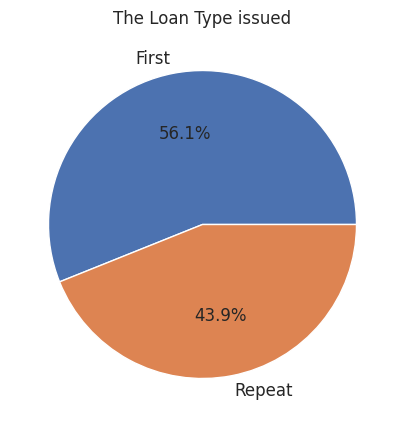

In [86]:
#Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.
ax = (cleaned_data['Loan_type'].value_counts()*100.0 /len(Data))\
.plot.pie(autopct='%.1f%%', labels = ['First', 'Repeat'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('',fontsize = 12)
ax.set_title('The Loan Type issued', fontsize = 12)

plt.show()